In [1]:
%pylab inline

from library import lasagnennet as LN
from library import features as F
from library import scale as S
from library import validate as V
import numpy as np
import theano as TH
import pandas as pa
import lasagne as L

Populating the interactive namespace from numpy and matplotlib


Using gpu device 0: Tesla K20m (CNMeM is disabled)


In [2]:
train_feats = pa.read_csv('train_feats.csv')
train_targets = pa.read_csv('train_targets.csv')
val_feats = pa.read_csv('validation_feats.csv')
val_targets = pa.read_csv('validation_targets.csv')

In [3]:
tx = np.asarray(train_feats, dtype=TH.config.floatX)
tyall = np.asarray(train_targets, dtype=TH.config.floatX)
ty = np.asarray(train_targets['LABEL'], dtype=TH.config.floatX).reshape(-1, 1)
vx = np.asarray(val_feats, dtype=TH.config.floatX)
vyall = np.asarray(val_targets, dtype=TH.config.floatX)
vy = np.asarray(val_targets['LABEL'], dtype=TH.config.floatX).reshape(-1, 1)

In [4]:
print vyall.shape

(152282, 4)


In [5]:
idtimes = [0 for i in xrange(3595)]
for i in vyall:
    idtimes[np.int32(i[0])] = max(idtimes[np.int32(i[0])], i[1])

In [6]:
ty = ty.ravel()
vy = vy.ravel()

In [30]:
from sklearn import svm
from sklearn.metrics import roc_curve
from sklearn.metrics import auc_score

In [19]:
clf = svm.SVC(verbose=True, max_iter=1000, class_weight={0:1, 1:5})
clf.fit(tx, ty)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight={0: 1, 1: 5}, coef0=0.0, degree=3,
  gamma=0.0, kernel='rbf', max_iter=1000, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=True)

In [20]:
probs = clf.decision_function(vx)

0.753556476318


/home/du2/12CS30009/anaconda/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function auc_score is deprecated; Function 'auc_score' has been renamed to 'roc_auc_score' and will be removed in release 0.16.
  warnings.warn(msg, category=DeprecationWarning)


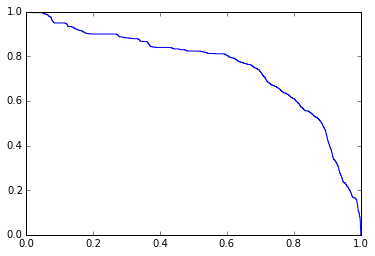

In [31]:
yscore = probs.ravel()
fpr, tpr, thresh = roc_curve(vy, yscore)
auc = auc_score(vy, yscore)
print auc
pyplot.plot(1-fpr, tpr)

In [36]:
thresh = np.percentile(probs.ravel(), 98.5)
pred = np.int32(probs.ravel() >= thresh)
print np.sum(pred)

2285


In [37]:
output = vyall.swapaxes(0,1)
output[2] = pred
output = output.swapaxes(0,1)

In [38]:
outfile = open('out.csv', 'w')
outfile.write('ID,TIME,LABEL,ICU\n')
for i in output:
    if i[3] == 1:
        outfile.write(','.join([str(int(j)) for j in i])+'\n')
outfile.close()

In [39]:
reload(V)
V.validate('out.csv', './Training_Dataset/id_label_train.csv')

tp :  13 , tn :  831 , fp :  6 , fn :  47
sensitivity :  0.216666666667 , specificity :  0.992831541219
accuracy :  0.940914158305 median prediction time :  102.333333333
finalScore :  37.6657706093


(0.21666666666666667,
 0.992831541218638,
 0.9409141583054627,
 102.33333333333333,
 37.665770609319026)